# **Importing libraries and loading data**

In [ ]:
!pip install visualkeras

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.metrics import Precision,Recall
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [10]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# **Model**

In [4]:
inp_img_A = Input((28, 28))
inp_img_B = Input((28, 28))


def create_cnn():
    inputs = Input(shape=(28, 28, 1))
    
    x = Conv2D(64, 3, 1, padding='same', activation='relu')(inputs)
    x = MaxPool2D()(x)
    x = Conv2D(128, 3, 1, padding='same', activation='relu')(x)
    x = MaxPool2D()(x)
    x = Conv2D(256, 3, 1, padding='same', activation='relu')(x)
    x = MaxPool2D()(x)
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(64, activation='relu')(x)

    return Model(inputs=inputs, outputs=outputs)

cnn = create_cnn()

feature_vector_A = cnn(inp_img_A)
feature_vector_B = cnn(inp_img_B)


concat = Concatenate()([feature_vector_A, feature_vector_B])

dense = Dense(64, activation='relu')(concat)
output = Dense(1, activation='sigmoid')(dense)

model = Model(inputs=[inp_img_A, inp_img_B], outputs=output)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 model (Functional)             (None, 64)           386112      ['input_3[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 128)          0           ['model[0][0]',            

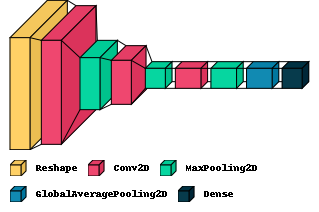

In [286]:
import visualkeras as vk
vk.layered_view(cnn,legend = True)

# **Randomly selection and Creating pairs**

In [11]:
rand_ind = np.random.choice(60000, 100, replace=False)
X_train= X_train[rand_ind]
y_train = y_train[rand_ind]
X_train.shape, y_train.shape

((100, 28, 28), (100,))

In [12]:
print("Number of images from each classes")
unique_values, counts = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

Number of images from each classes
0: 8
1: 10
2: 15
3: 14
4: 5
5: 14
6: 10
7: 6
8: 13
9: 5


In [13]:
rand_int = np.random.choice(10000, 100, replace=False)
X_test = X_test[rand_int]
y_test = y_test[rand_int]
X_test.shape, y_test.shape

((100, 28, 28), (100,))

In [14]:
def make_pairs(X, y):
    pairs = []
    labels = []

    for i in range(len(X)):
        for j in range(0, len(X)):
            label = int(y[i] == y[j])
            pairs.append([X[i], X[j]])
            labels.append(label)

    return np.array(pairs), np.array(labels)

In [15]:
X_train_pairs, y_train_pairs = make_pairs(X_train, y_train)
X_train_pairs.shape, y_train_pairs.shape

((10000, 2, 28, 28), (10000,))

In [16]:
X_test_pairs, y_test_pairs = make_pairs(X_test, y_test)
X_test_pairs.shape, y_test_pairs.shape

((10000, 2, 28, 28), (10000,))

In [17]:
Precision = Precision(thresholds=0.5)
Recall = Recall(thresholds=0.5)

# **Training the model**

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy',Precision,Recall])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=)

In [20]:
X_train_pair1 = X_train_pairs[:, 0, :, :]
X_train_pair2 = X_train_pairs[:, 1, :, :]
X_test_pair1 = X_test_pairs[:, 0, :, :]
X_test_pair2 = X_test_pairs[:, 1, :, :]

In [106]:
model.fit(x=[X_train_pair1,X_train_pair2], y=y_train_pairs,
          validation_data=([X_test_pair1, X_test_pair2], y_test_pairs),
          epochs=100,
          batch_size=32,
          callbacks=[es])

Epoch 1/100
313/313 [==============================] - 4s 11ms/step - loss: 4.9801e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.8812 - val_accuracy: 0.8795 - val_precision: 0.4725 - val_recall: 0.5379
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 3.7984e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.8993 - val_accuracy: 0.8792 - val_precision: 0.4716 - val_recall: 0.5423
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 2.9041e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.9132 - val_accuracy: 0.8797 - val_precision: 0.4735 - val_recall: 0.5441
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 2.2190e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.9288 - val_accuracy: 0.8797 - val_precision: 0.4735 - val_recall: 0.5432


# **Testing the model**

In [45]:
test1 = [11,51,6,80,17,9]
test2 = [58,20,22,4,6,45]

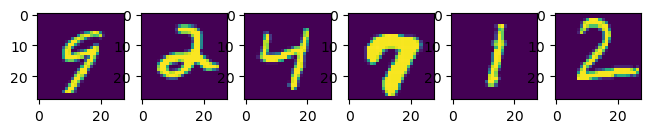

In [46]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(200,100))

for i in range(0,6):
    img = X_test[test1[i]]
    fig.add_subplot(1,150,i+1)
    plt.imshow(img)
plt.show()

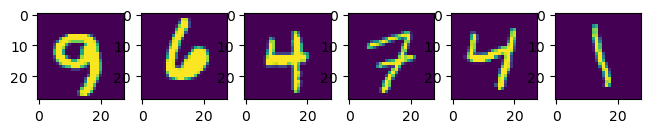

In [47]:
fig=plt.figure(figsize=(200,100))

for i in range(0,6):
    img = X_test[test2[i]]
    fig.add_subplot(1,150,i+1)
    plt.imshow(img)
plt.show()

In [107]:
for i in range(6):
    pred = model.predict([X_test[test1[i]].reshape((1, 28, 28)), 
               X_test[test2[i]].reshape((1, 28, 28))])[0]
    print(pred)

1/1 [==============================] - 0s 22ms/step
[0.9998022]
1/1 [==============================] - 0s 22ms/step
[5.544063e-28]
1/1 [==============================] - 0s 22ms/step
[0.12091425]
1/1 [==============================] - 0s 22ms/step
[0.95598274]
1/1 [==============================] - 0s 22ms/step
[1.3055099e-08]
1/1 [==============================] - 0s 22ms/step
[0.]


# **Creating new Model**

In [95]:
op = cnn(inp_img_A)
new_model  = Model(inputs = [inp_img_A],outputs= op)
test_pred = new_model.predict([X_test])

4/4 [==============================] - 0s 2ms/step


In [96]:
def euclidean_distance(x1, x2):
    diff = x1 - x2
    squared_diff = diff ** 2
    sum_squared_diff = np.sum(squared_diff)
    dist = np.sqrt(sum_squared_diff)
    return dist

In [97]:
num_ind = [4,7,45,22,36,51,30,6,74,18]
new_X_train = X_train[num_ind]
data = new_model.predict(new_X_train)

1/1 [==============================] - 0s 70ms/step


In [98]:
def distance(n):
    dist = []
    for i in range(10):
        dist.append(euclidean_distance(data[i],test_pred[n]))
    return dist

In [99]:
dist = distance(17)
dist

[381.8539,
 16.9785,
 401.58017,
 283.4615,
 80.16472,
 198.74228,
 140.09193,
 197.41551,
 91.99724,
 108.84939]

In [100]:
y_test[17]

1

In [101]:
dist.index(min(dist))

1

In [102]:
final_pred = []
for i in range(0,100):
    dist = distance(i)
    final_pred.append(dist.index(min(dist)))

In [108]:
count = 0
for i in range(100):
    if(y_test[i]==final_pred[i]):
        count+=1
count

53

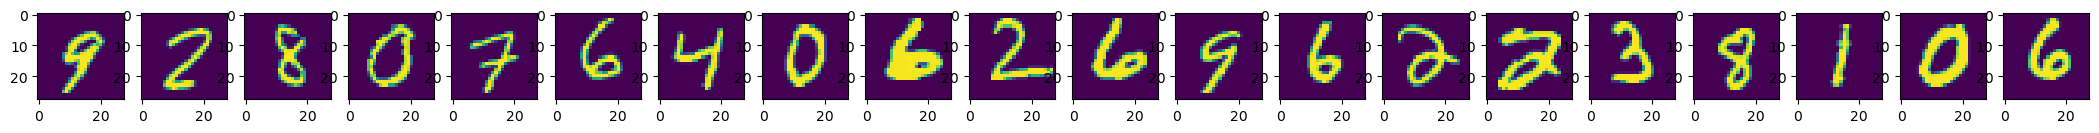

In [104]:
fig=plt.figure(figsize=(200,100))

for i in range(0,20):
    img = X_test[i]
    fig.add_subplot(1,150,i+1)
    plt.imshow(img)
plt.show()

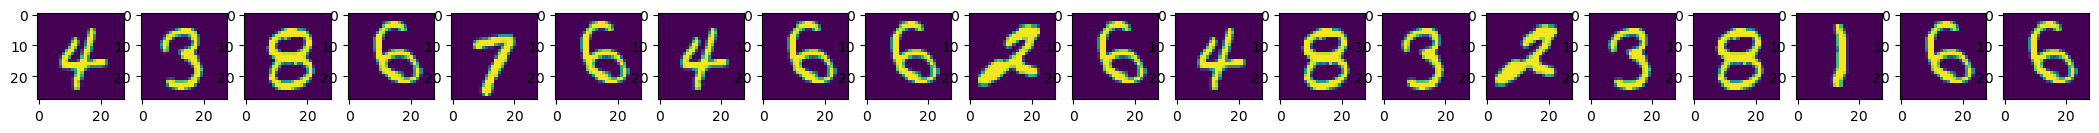

In [105]:
fig=plt.figure(figsize=(200,100))

for i in range(0,20):
    img = new_X_train[final_pred[i]]
    fig.add_subplot(1,150,i+1)
    plt.imshow(img)
plt.show()